# Movie Genres Project

# Research Questions
1. Which genres have the highest amount of movies?
2. Which genres have the highest avgerage budgest and average revenue?
3. Which genres have the highest average profit?
4. Which genres have the highest average popularity?
5. Which genres have a voting avgerage of 8 or above? (minimun 50 votes)

Step one, import what we will need.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next, read in our csv file and pull up info for quick overview

In [3]:
# please change the path below to match your computer

movies = pd.read_csv(r"C:MySQLFiles\Projects\Movie Genres\imdb_movies.csv")

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Now I will remove the duplicates from the data
Also, I will remove any rows will "null" data in the 'genres' column

In [5]:
movies.drop_duplicates(inplace = True)

In [6]:
movies.dropna(subset = 'genres', inplace = True)

In [7]:
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Before I get started, I would like to add a column for profit
Also, I will create new database with only columns needed to answer project questions

In [8]:
movies['profit'] = movies['revenue'] - movies['budget']

In [9]:
movie_genres = movies[['popularity','budget','revenue','profit','original_title','genres', 'runtime', 'release_date','vote_count','vote_average']]

In [10]:
movie_genres.head(1)

,popularity,budget,revenue,profit,original_title,genres,runtime,release_date,vote_count,vote_average
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,6/9/15,5562,6.5


After looking at this, I want to split the genres up.
To do this we have to split genres, then create new database with same index.
Then we need to join the 2 databases together.

In [11]:
from pandas import Series, DataFrame
split = movie_genres['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movie_genres['genres']
movie_genres = movie_genres.join(split)

In [12]:
movie_genres.head(10)

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genres_split
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Action
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Adventure
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Science Fiction
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Thriller
2,13.112507,110000000,295238201,185238201,Insurgent,119,3/18/15,2480,6.3,Adventure
2,13.112507,110000000,295238201,185238201,Insurgent,119,3/18/15,2480,6.3,Science Fiction


In [13]:
# Time to answer above questions

1. Which genres have the highest amount of movies?

In [16]:
movies_common = movie_genres.groupby('genres_split').count().sort_values(by = ['popularity'], ascending = True)

In [17]:
movies_common = pd.DataFrame(movies_common['popularity'])
movies_common

,popularity
genres_split,
Western,165
TV Movie,167
Foreign,188
War,270
History,334
Music,408
Documentary,520
Animation,699
Mystery,810


<Axes: title={'center': 'Movies Per Genre'}, xlabel='Amount of Movies', ylabel='Genres'>

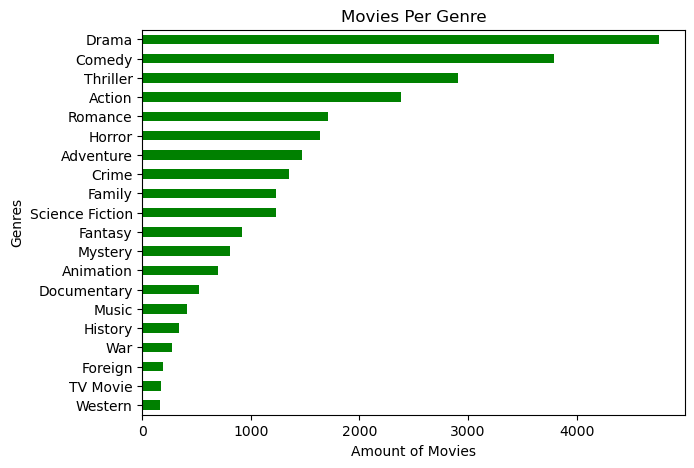

In [20]:
movies_common['popularity'].plot.barh(title= 'Movies Per Genre', xlabel= 'Amount of Movies', ylabel= 'Genres', color = "green", figsize = (7,5))

2. Which genres have the highest average budget and average revenue?
3. Which genres have the highest average profit?
4. Which genres have the highest average popularity?

I grouped these together because we can answer all with the next database created

In [22]:
movies_avg = pd.DataFrame(movie_genres.groupby('genres_split').mean(numeric_only=True))
pd.options.display.float_format = '{:2f}'.format
movies_avg

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,45066911.671141,104.917785,392.993708,5.787752
Adventure,1.154259,37543694.530931,113137861.069341,75594166.538409,106.173351,513.125085,5.940585
Animation,0.852182,23159781.606581,75256062.223176,52096280.616595,68.181688,303.000000,6.403147
Comedy,0.592607,13297915.618244,37526242.072238,24228326.453994,96.745057,176.436330,5.905167
Crime,0.744930,17663801.124815,42368661.645495,24704860.520679,106.917282,278.805022,6.124889
Documentary,0.181432,577149.148077,2041106.994231,1463957.846154,102.651923,35.105769,6.908462
Drama,0.591495,11880717.773529,29232255.725840,17351537.952311,110.478151,182.544538,6.165546
Family,0.786668,23359337.420796,72433176.373680,49073838.952884,89.603574,272.320877,5.997563
Fantasy,0.992840,32612585.348253,96313657.081878,63701071.733624,100.736900,420.741266,5.863537


In [23]:
movies_avg.sort_values(by = 'revenue', inplace = True)

<Axes: title={'center': 'Budget & Revenue by Genre'}, xlabel='Budget', ylabel='Genres'>

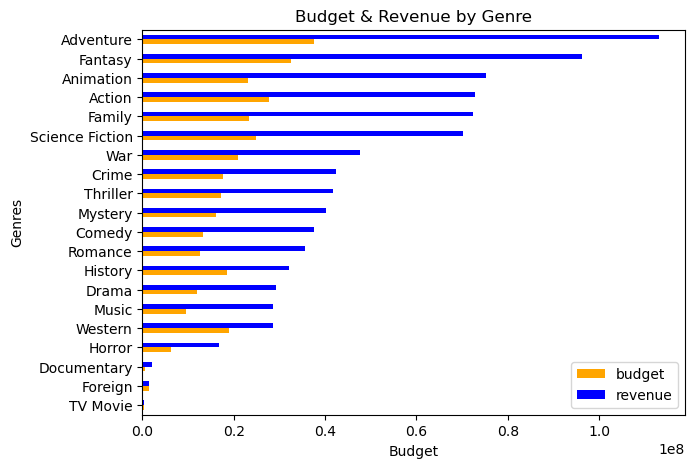

In [24]:
movies_avg[['budget', 'revenue']].plot.barh(title= 'Budget & Revenue by Genre', xlabel= 'Budget', ylabel= 'Genres', color = ["orange", 'blue'], figsize = (7,5))

<Axes: title={'center': 'Profit by Genre'}, xlabel='Profit', ylabel='Genres'>

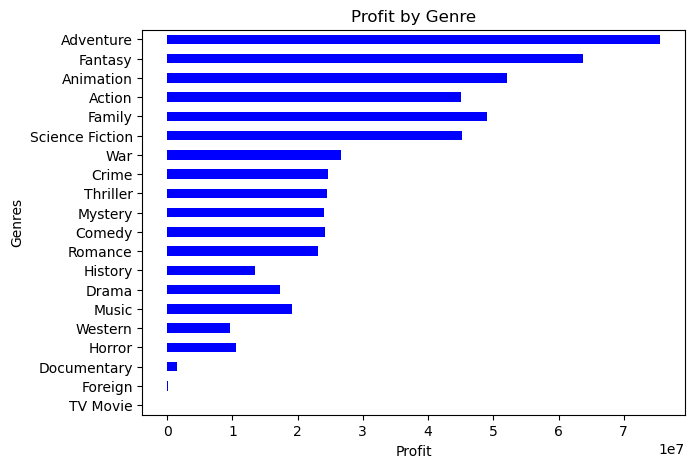

In [25]:
movies_avg['profit'].plot.barh(title= 'Profit by Genre', xlabel = 'Profit', ylabel = 'Genres', color = 'blue', figsize = (7,5))

<Axes: title={'center': 'Popularity by Genre'}, xlabel='Popularity', ylabel='Genres'>

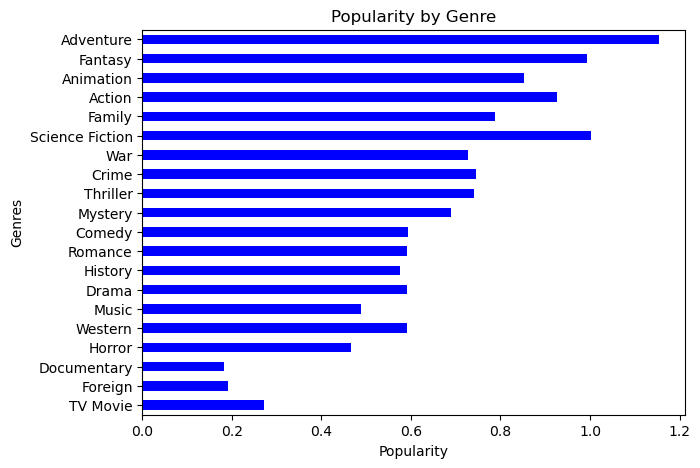

In [27]:
movies_avg['popularity'].plot.barh(title= 'Popularity by Genre', xlabel = 'Popularity', ylabel = 'Genres', color = 'blue', figsize = (7,5))

5. Which genres have a voting avgerage of 8 or above? (min 50 votes)

In [28]:
movie_vote = movie_genres[(movie_genres['vote_count'] >= 50) & (movie_genres['vote_average'] > 8)]

In [29]:
movie_vote

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genres_split
609,0.033378,0,0,0,The Jinx: The Life and Deaths of Robert Durst,240,2/8/15,72,8.400000,Documentary
650,4.780419,3300000,13993093,10693093,Whiplash,105,10/10/14,2372,8.200000,Drama
650,4.780419,3300000,13993093,10693093,Whiplash,105,10/10/14,2372,8.200000,Music
2409,8.947905,63000000,100853753,37853753,Fight Club,139,10/14/99,5923,8.100000,Drama
2875,8.466668,185000000,1001921825,816921825,The Dark Knight,152,7/16/08,8432,8.100000,Drama
2875,8.466668,185000000,1001921825,816921825,The Dark Knight,152,7/16/08,8432,8.100000,Action
2875,8.466668,185000000,1001921825,816921825,The Dark Knight,152,7/16/08,8432,8.100000,Crime
2875,8.466668,185000000,1001921825,816921825,The Dark Knight,152,7/16/08,8432,8.100000,Thriller
3310,0.102845,0,0,0,Dear Zachary: A Letter to a Son About His Father,95,10/31/08,74,8.300000,Crime
3310,0.102845,0,0,0,Dear Zachary: A Letter to a Son About His Father,95,10/31/08,74,8.300000,Documentary


In [30]:
vote_count = movie_vote.groupby('genres_split').count().sort_values(by = ['vote_average'], ascending = True)
vote_count = pd.DataFrame(vote_count)

In [31]:
vote_count

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average
genres_split,,,,,,,,,
Action,1,1,1,1,1,1,1,1,1
Adventure,1,1,1,1,1,1,1,1,1
Comedy,1,1,1,1,1,1,1,1,1
History,1,1,1,1,1,1,1,1,1
Music,1,1,1,1,1,1,1,1,1
Romance,1,1,1,1,1,1,1,1,1
War,1,1,1,1,1,1,1,1,1
Thriller,2,2,2,2,2,2,2,2,2
Documentary,4,4,4,4,4,4,4,4,4


<Axes: title={'center': 'Number Of Movies With Vote Average Above 8 by Genre'}, xlabel='Number of Movies', ylabel='Genres'>

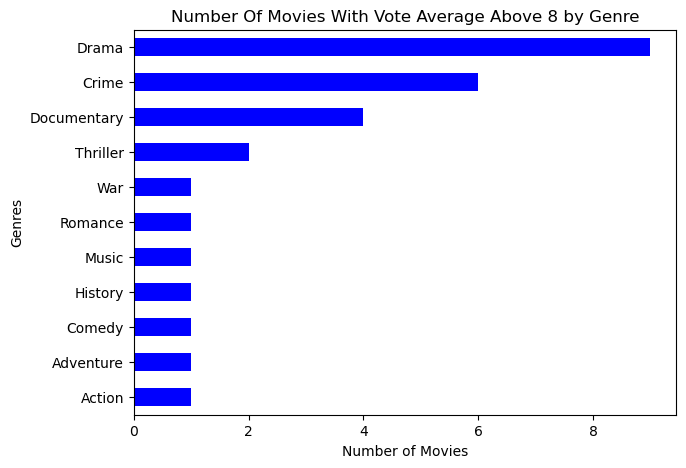

In [32]:
vote_count['vote_average'].plot.barh(title= 'Number Of Movies With Vote Average Above 8 by Genre', xlabel = 'Number of Movies', ylabel = 'Genres', color = 'blue', figsize = (7,5))

# Bonus
For this part I will just do a couple of scatter plots just to show correlation between revenue and a few other variables

In [ ]:
movie_genres2 = movies[['popularity','budget','revenue','profit','original_title','genres', 'runtime', 'release_date','vote_count','vote_average', 'release_year']]

<Axes: xlabel='popularity', ylabel='revenue'>

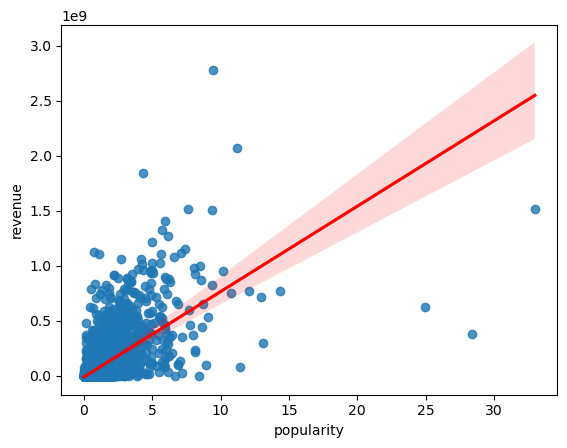

In [144]:
sns.regplot(data=movie_genres2, x = 'popularity', y = 'revenue', line_kws = {"color": "red"})

<Axes: xlabel='budget', ylabel='revenue'>

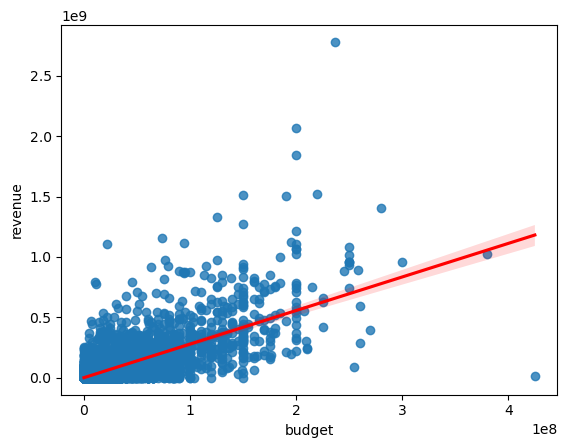

In [133]:
sns.regplot(data=movie_genres2, x = 'budget', y = 'revenue', line_kws = {"color": "red"})

<Axes: xlabel='runtime', ylabel='revenue'>

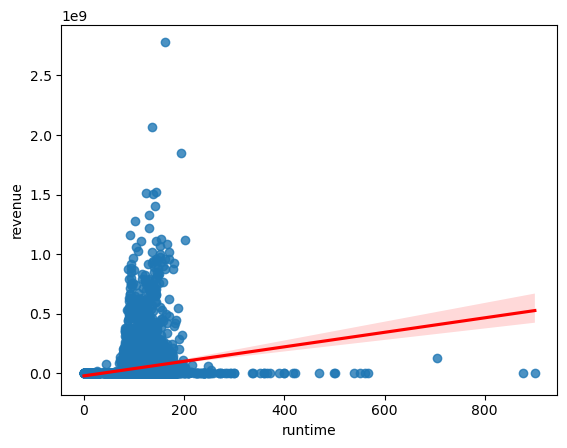

In [137]:
sns.regplot(data=movie_genres2, x = 'runtime', y = 'revenue', line_kws = {"color": "red"})